## **Tranfer Learning (Machine Learning)**
Image classification of the cifar10 dataset which contains 60000 images which can be classified into 10 classes will be carried out using 3 techniques.
1. Artifical Neural Network(ANN)
2.Convolutional Neural Network(CNN)
3. Transfer Learning using the VGG16 model.

In [10]:
#Import all the libraries that will be used in all the technniques
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import PIL
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras import callbacks,datasets
from tensorflow.keras import optimizers, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import vgg16 as vgg
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy.misc
import cv2

## **Import the cifar10 dataset and exploring it.**
cifar10 has 60000 images with dimensions of 32,32,3.
3 is the number of rgb channels

In [2]:
#Printing the shapes
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print('The shape of of X_train is : ', X_train.shape)
print('The shape of X_test is  : ', X_test.shape)
print('The shape of 1st image in X_train is : ', X_train[0].shape)
print('The shape of y_train is : ', y_train.shape)
print('The shape of y_test is : ', y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
The shape of of X_train is :  (50000, 32, 32, 3)
The shape of X_test is  :  (10000, 32, 32, 3)
The shape of 1st image in X_train is :  (32, 32, 3)
The shape of y_train is :  (50000, 1)
The shape of y_test is :  (10000, 1)


First image in X_train : 
Image of a frog


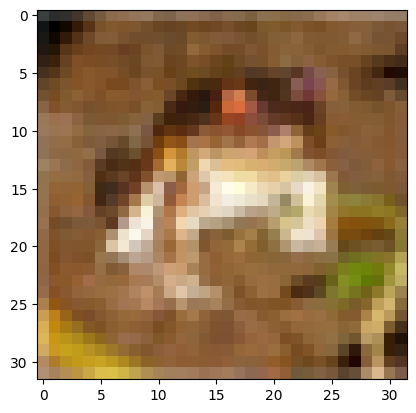

In [3]:
#Printing the first image in X_train.
print('First image in X_train : ')
plt.imshow(X_train[0])
print('Image of a frog')

In [4]:
#Convert y_train and y_test which contains the output classes from a multidimensional array to a 1D array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print('The first 5 values in y_train : ',y_train[:5])
print('The first 5 values in y_test : ', y_test[:5])


The first 5 values in y_train :  [6 9 9 4 1]
The first 5 values in y_test :  [3 8 8 0 6]


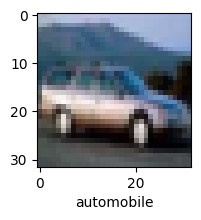

In [5]:
#Creating the 10 output classes for y_train
classes =  ['airplance', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Creating a function to print the image from X_train and the output class using y_train and the classses list
def plot_sample(X,y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

#Printing the image at position 4 and its corresponding class at position 4 in y_train
plot_sample(X_train, y_train, 4)
#Image at position 4 is an image of autombile and the class is automobile

# Nomralizing the data before training it.

In [6]:
#Implement feature scaling, now all the values in X_train and X_test is between 0 and 1.
X_train = X_train / 255
X_test = X_test / 255

## **Image Classification using Artificial Neural Network**

In [7]:
#Creating a ANN model
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

#Compiling the ANN model
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy', #Check documentation to see why they use sparse_categorical_entropy instead of categorical_entropy
            metrics = ['accuracy'])

#Training the ANN model with 10 epochs and checking accuracy
ann_fit = ann.fit(X_train, y_train, epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8152 - accuracy: 0.3517
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6241 - accuracy: 0.4268
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5418 - accuracy: 0.4558
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4816 - accuracy: 0.4765
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4333 - accuracy: 0.4952
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3894 - accuracy: 0.5121
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3509 - accuracy: 0.5226
Epoch 8/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3155 - accuracy: 0.5390
Epoch 9/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2820 - accuracy: 0.5499
Epoch 10/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.25

Since we have used a simple ANN model, it can be observed that accuracy is really low (60) even with 15 epochs as there are not convolutional filters present.

# Evaluating the performance of ANN MODEL

In [8]:
#Checking the accuracy on y_test
ann.evaluate(X_test,y_test)
#It can be observed that accuracy (50.18) is not great while evaluating the test data set also

313/313 [==============================] - 1s 3ms/step - loss: 1.4056 - accuracy: 0.5107


[1.4056289196014404, 0.510699987411499]

313/313 [==============================] - 1s 2ms/step
Classification Report for ANN model : 
               precision    recall  f1-score   support

           0       0.46      0.73      0.56      1000
           1       0.77      0.50      0.61      1000
           2       0.35      0.57      0.43      1000
           3       0.49      0.16      0.25      1000
           4       0.50      0.40      0.44      1000
           5       0.52      0.34      0.41      1000
           6       0.58      0.61      0.60      1000
           7       0.45      0.75      0.57      1000
           8       0.62      0.63      0.63      1000
           9       0.71      0.39      0.51      1000

    accuracy                           0.51     10000
   macro avg       0.54      0.51      0.50     10000
weighted avg       0.54      0.51      0.50     10000

Confusion Matrix for ANN model : 


Text(0.5, 1.0, 'Confusion Matrix for ANN')

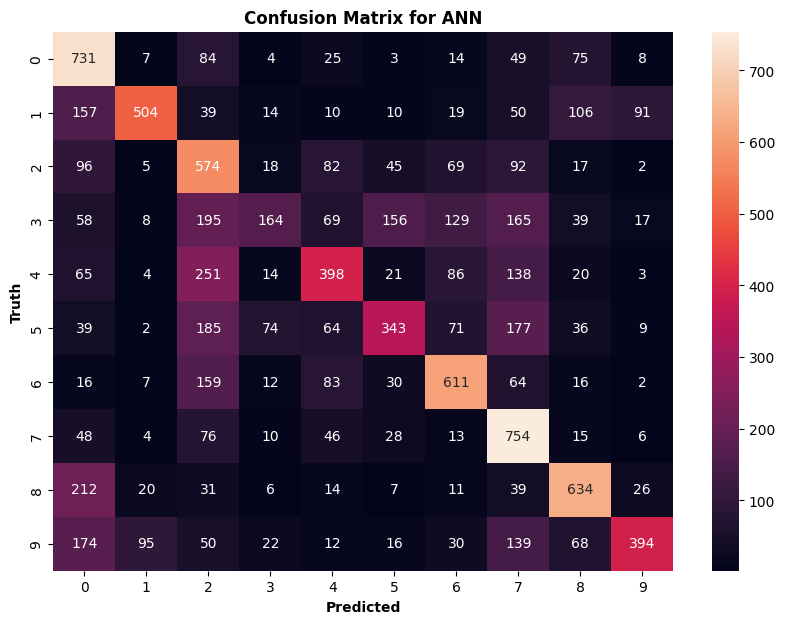

In [9]:
#Printing the classification report for the ANN MODEL
y_pred = ann.predict(X_test)
#Since y_pred for an image has 10 scores for each classes, the index position with the highest score is selected using np.argmax
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report for ANN model : \n", classification_report(y_test, y_pred_classes))
#Prining the confusion matrix for ANN model
print('Confusion Matrix for ANN model : ')
cm = tf.math.confusion_matrix(labels  = y_test, predictions = y_pred_classes)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted', weight = 'bold')
plt.ylabel('Truth', weight = 'bold')
plt.title('Confusion Matrix for ANN', weight = 'bold')

# Accuracy and Loss graphs for ANN

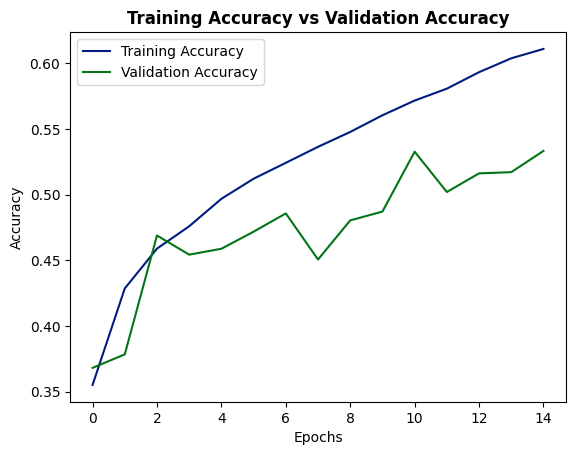

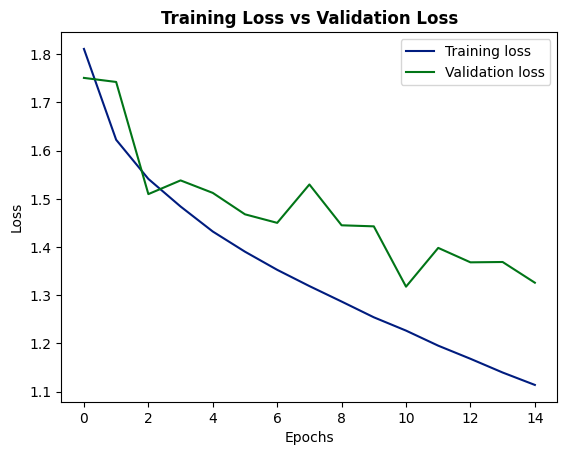

In [ ]:
#Plotting the graph for accuracy for ANN
plt.figure(0)
plt.style.use('seaborn-v0_8-dark-palette')
plt.plot(ann_fit.history['accuracy'], label = 'Training Accuracy') # Accuracy graph for training data
plt.plot(ann_fit.history['val_accuracy'], label = 'Validation Accuracy')  #Accuracy graph for validation data
plt.title("Training Accuracy vs Validation Accuracy", weight = 'bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


#Plotting the graph for loss for ANN
plt.figure(1)
plt.plot(ann_fit.history['loss'], label="Training loss") #Loss graph for training data
plt.plot(ann_fit.history['val_loss'], label="Validation loss") #Loss graph for validation data
plt.title("Training Loss vs Validation Loss", weight = 'bold')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.show()

## **Image Classification using Convolutional Neural Network (CNN)**

In [7]:
#Performing the data augmentation for CNN model
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (32,32,3)),
    #layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [8]:
#Creating the CNN model
cnn = models.Sequential([
    #first layer is the data augmentation layer
    data_augmentation,
    #The first set of convolution and pooling layer.
    layers.Conv2D(filters = 64, padding = 'same', input_shape = (32,32,3), activation = 'relu', kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),

    #The second set of convolution and pooling layer
    layers.Conv2D(filters = 128, padding = 'same', activation = 'relu', kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),

    #Adding a drop layer to drop 20% of the neurons
    layers.Dropout(0.2),
    #Flatter layer as the dense layer will only accept 1D array as input.
    layers.Flatten(),
    layers.Dense(200, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')#softmax is another activation function we use instead of sigmoid, softmax gives you normalized values
])


#Compiling the CNN model
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

#Training the cnn model
cnn_fit = cnn.fit(X_train, y_train, epochs = 15, validation_split=0.2, validation_data = (X_test, y_test) )

Epoch 1/15
1563/1563 [==============================] - 21s 7ms/step - loss: 1.4018 - accuracy: 0.5001 - val_loss: 1.0850 - val_accuracy: 0.6186
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0589 - accuracy: 0.6263 - val_loss: 1.0406 - val_accuracy: 0.6366
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9444 - accuracy: 0.6698 - val_loss: 0.8868 - val_accuracy: 0.6891
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8610 - accuracy: 0.6970 - val_loss: 0.8418 - val_accuracy: 0.7093
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8081 - accuracy: 0.7160 - val_loss: 0.8470 - val_accuracy: 0.7072
Epoch 6/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7583 - accuracy: 0.7336 - val_loss: 0.8427 - val_accuracy: 0.7149
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7136 - accuracy: 0.7478 - val_loss: 0.8223 - val_ac

The accuracy of image classification using CNN was found out to be 82% which is better than accuracy score of ANN, but is not a really good performing model.

In [9]:
#Finding the accuracy of the y_test dataset using CNN model
cnn.evaluate(X_test,y_test)
#The accuracy score of CNN model on test data is 66%.

313/313 [==============================] - 1s 3ms/step - loss: 0.7772 - accuracy: 0.7558


[0.7771926522254944, 0.7558000087738037]

## Evaluating the performance of CNN MODEL

313/313 [==============================] - 1s 3ms/step
The predicted value at position 1 is :  ship
The predicted value at position 7 is :  frog


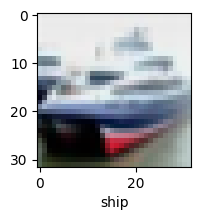

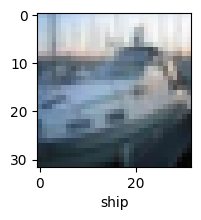

In [17]:
#Example of correct predictionL
y_pred = cnn.predict(X_test)
#Since y_pred for an image has 10 scores for each classes, the index position with the highest score is selected using np.argmax
y_pred_classes = [np.argmax(element) for element in y_pred]
plot_sample(X_test,y_test,1)
print('The predicted value at position 1 is : ',classes[y_pred_classes[1]])
#Example of wrong prediction
plot_sample(X_test,y_test,2)
print('The predicted value at position 7 is : ',classes[y_pred_classes[7]])

313/313 [==============================] - 1s 2ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      1000
           1       0.83      0.90      0.86      1000
           2       0.65      0.71      0.68      1000
           3       0.62      0.51      0.56      1000
           4       0.79      0.63      0.70      1000
           5       0.68      0.64      0.66      1000
           6       0.75      0.83      0.79      1000
           7       0.81      0.82      0.81      1000
           8       0.86      0.85      0.85      1000
           9       0.78      0.88      0.83      1000

    accuracy                           0.76     10000
   macro avg       0.75      0.76      0.75     10000
weighted avg       0.75      0.76      0.75     10000



Text(0.5, 1.0, 'Confusion Matrix for CNN')

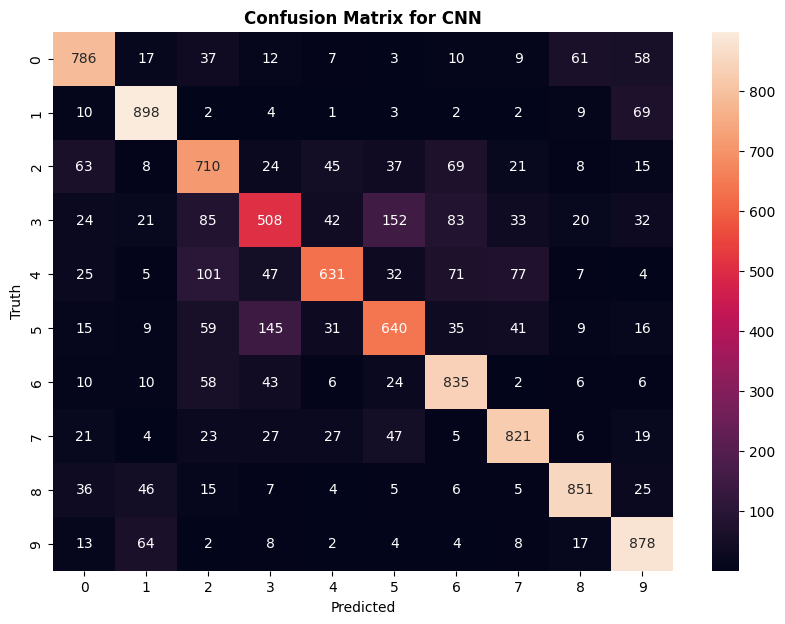

In [18]:
#Printing the classification report and Confusion matrix for CNN model
#Printing the classification report for the CNN MODEL
y_pred = cnn.predict(X_test)
#Since y_pred for an image has 10 scores for each classes, the index position with the highest score is selected using np.argmax
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report : \n", classification_report(y_test, y_pred_classes))
cm = tf.math.confusion_matrix(labels  = y_test, predictions = y_pred_classes)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for CNN', weight = 'bold')

# Accuracy and Loss graphs for CNN

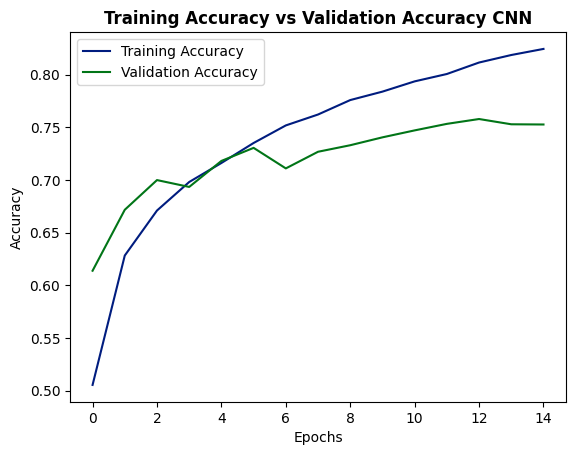

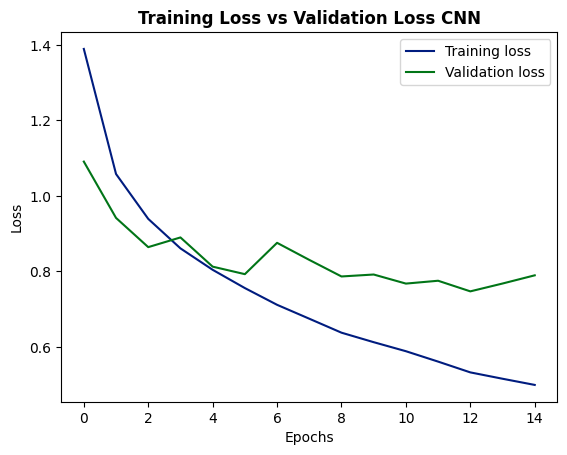

In [ ]:
#Plotting the graph for accuracy for CNN
plt.figure(0)
plt.style.use('seaborn-v0_8-dark-palette')
plt.plot(cnn_fit.history['accuracy'], label = 'Training Accuracy') # Accuracy graph for training data
plt.plot(cnn_fit.history['val_accuracy'], label = 'Validation Accuracy')  #Accuracy graph for validation data
plt.title("Training Accuracy vs Validation Accuracy CNN", weight = 'bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


#Plotting the graph for loss for CNN
plt.figure(1)
plt.plot(cnn_fit.history['loss'], label="Training loss") #Loss graph for training data
plt.plot(cnn_fit.history['val_loss'], label="Validation loss") #Loss graph for validation data
plt.title("Training Loss vs Validation Loss CNN", weight = 'bold')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.show()

## **Image Classification using Transfer Learning using VGG16 Model**
Since ANN and CNN models did not perform really well in the image classification of cifar10 dataset, transfer learning will be implemented using the VGG16 model, This network was trained on the ImageNet dataset, containing more than 14 million high-resolution images belonging to 1000 different labels.

In [11]:
#Initializing values
BATCH_SIZE = 32
EPOCHS = 6
NUM_CLASSES = 10
LEARNING_RATE = 1e-4
MOMENTUM = 0.9

In [25]:
#import scipy to resize images quickly after loading the cifar10 dataset
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()

X_train = np.array([cv2.resize(x, (48,48), interpolation = cv2.INTER_AREA) for x in X_train])
X_test = np.array([cv2.resize(x, (48,48), interpolation = cv2.INTER_AREA) for x in X_test])
y_test_reshape = y_test.reshape(-1,)
y_train_reshape = y_train.reshape(-1,)

In [26]:
#Fetching the base model from VGG1 architecture and exluding the top layers in the architecture
#Imagenet is assignet as the weights
base_model = vgg.VGG16(weights = 'imagenet',
                       include_top = False,
                       input_shape = (48,48,3))

In [27]:
#Perform one hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

In [28]:
#Extract the last layer from third block of vgg16 model
last = base_model.get_layer('block3_pool').output

In [29]:
#Creating classification layers and the top layers based on the requirements of the cifar10 dataset
x = GlobalAveragePooling2D()(last)
x = BatchNormalization()(x)
x = Dense(400, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dropout(0.2)(x)

#Since our classification layers are ready now, top layer with 10 output classes is stacked on top of the classification layers
number_of_classes = 10
top = Dense(number_of_classes, activation = 'softmax')(x)
#The top layer and the classification layers are ready and are stacked up.

from tensorflow.keras import optimizers, Model
#Stacking the top layer and classification layers on top of the base model from the VGG16 architecture
model = Model(base_model.input, top)

# Freezing the hidden layers to train our custom VGG16 model.
Since the hidden layers are frozen, the parameters in the hidden layer will not be trained, only in the parameters in the final classification layers and the top layer will be trained.

In [30]:
#Iterating through every hidden layer and freezing them
for layer in base_model.layers:
  layer.trainable = False

#Compiling the merged model.
model.compile(loss = 'BinaryCrossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])





# Model Summary

In [31]:
print(model.summary())


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

Here it can be observed that all the parameters in the final layers were trained, the parameters in the hidden layers were not trained as they were frozen.

## Training the model with VGG16 architecture

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32, callbacks=[es])




Epoch 1/50
1563/1563 [==============================] - 15s 8ms/step - loss: 0.0617 - accuracy: 0.9062
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0507 - accuracy: 0.9147
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0474 - accuracy: 0.9172
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0444 - accuracy: 0.9234
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0423 - accuracy: 0.9265
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0411 - accuracy: 0.9288
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0384 - accuracy: 0.9337
Epoch 8/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0382 - accuracy: 0.9341
Epoch 9/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0357 - accuracy: 0.9383
Epoch 10/50
1563/1563 [==============================] - 13s 8ms/step - l

The accuracy of transfer learning model was found out to be highest of 96.7%. The transfer learning model performed way better than the ANN and CNN model.

# Evaluating the performance of VGG16 transfer learning model

In [42]:
#Evaluating the accuracy on test dataset.
model.evaluate(X_test,y_test)

1563/1563 [==============================] - 12s 8ms/step - loss: 0.0050 - accuracy: 0.9925


[0.004961658269166946, 0.9925400018692017]

1563/1563 [==============================] - 8s 5ms/step
Classification Report for VGG16 transfer learning model : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      5000
           1       1.00      1.00      1.00      5000
           2       1.00      0.97      0.98      5000
           3       0.98      0.99      0.99      5000
           4       0.99      0.99      0.99      5000
           5       0.99      1.00      0.99      5000
           6       0.99      0.99      0.99      5000
           7       1.00      1.00      1.00      5000
           8       1.00      0.99      1.00      5000
           9       1.00      1.00      1.00      5000

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



Text(0.5, 1.0, 'Confusion Matrix for VGG16')

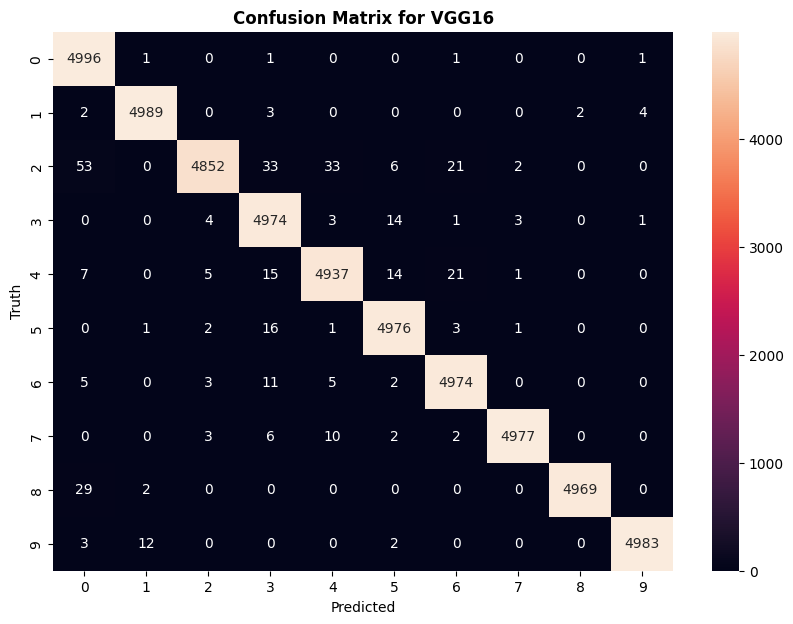

In [40]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
#Printing the classification report for VGG16 transfer learning model.
print("Classification Report for VGG16 transfer learning model : \n", classification_report(y_test_reshape, y_pred_classes))

#Printing the confusion matrix for VGG16 transfer learning model
cm = tf.math.confusion_matrix(labels  = y_test_reshape, predictions = y_pred_classes)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for VGG16', weight = 'bold')

# Accuracy and Loss graphs for VGG16 transfer learning model

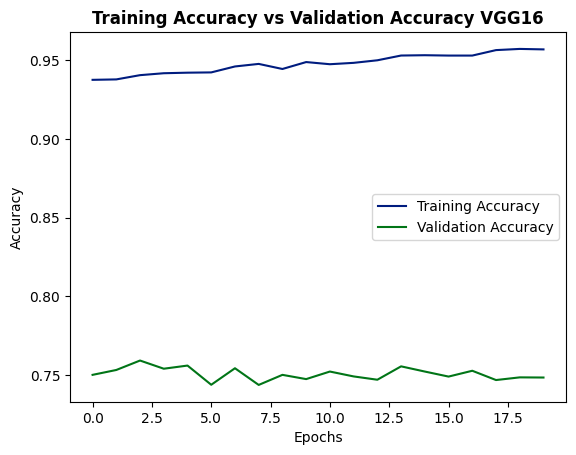

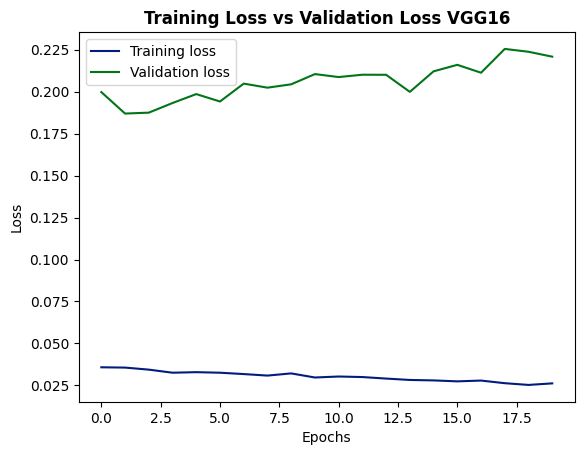

In [ ]:
#Plotting the graph for accuracy for VGG16 transfer learning model
plt.figure(0)
plt.style.use('seaborn-v0_8-dark-palette')
plt.plot(tl_model.history['accuracy'], label = 'Training Accuracy') # Accuracy graph for training data
plt.plot(tl_model.history['val_accuracy'], label = 'Validation Accuracy')  #Accuracy graph for validation data
plt.title("Training Accuracy vs Validation Accuracy VGG16", weight = 'bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


#Plotting the graph for loss for VGG16 transfer learning model
plt.figure(1)
plt.plot(tl_model.history['loss'], label="Training loss") #Loss graph for training data
plt.plot(tl_model.history['val_loss'], label="Validation loss") #Loss graph for validation data
plt.title("Training Loss vs Validation Loss VGG16", weight = 'bold')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.show()